###Data Wrangling II
Consider the “Academic performance” dataset of students (xAPI-
Edu-Data.csv) and perform the following operations using Python.

Scan all variables for missing values and inconsistencies. If there
are missing values and/or inconsistencies, use any of the suitable
techniques to deal with them.
Scan all numeric variables for outliers. If there are outliers, use any
of the suitable techniques to deal with them.
Apply data transformations on at least one of the variables. The
purpose of this transformation should be one of the following
reasons: to change the scale for better understanding of the
variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal
distribution.
Reason and document your approach properly.

Importing required libraries

In [ ]:
import pandas as pd
import numpy as np

Loading dataset

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Dataset/xAPI-Edu-Data.csv')
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16.0,2.0,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20.0,3.0,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7.0,0.0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,NaN,5.0,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,NaN,50.0,12.0,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5.0,4.0,5.0,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50.0,77.0,14.0,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55.0,74.0,25.0,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30.0,17.0,14.0,57,No,Bad,Above-7,L


Statistics of the dataset

In [ ]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,460.000000,476.000000,469.000000,480.000000
mean,46.708696,54.701681,37.897655,43.283333
std,30.919425,33.111157,26.673520,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.000000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


Checking for missing values in the dataset

In [ ]:
missing_values = data.isnull().sum()
missing_values

gender                       0
NationalITy                  0
PlaceofBirth                 0
StageID                      0
GradeID                      0
SectionID                    0
Topic                       10
Semester                     0
Relation                    15
raisedhands                 20
VisITedResources             4
AnnouncementsView           11
Discussion                   0
ParentAnsweringSurvey        0
ParentschoolSatisfaction     5
StudentAbsenceDays           5
Class                       13
dtype: int64

In [ ]:
missing_percentage = 100*missing_values/len(data)
missing_percentage

gender                      0.000000
NationalITy                 0.000000
PlaceofBirth                0.000000
StageID                     0.000000
GradeID                     0.000000
SectionID                   0.000000
Topic                       2.083333
Semester                    0.000000
Relation                    3.125000
raisedhands                 4.166667
VisITedResources            0.833333
AnnouncementsView           2.291667
Discussion                  0.000000
ParentAnsweringSurvey       0.000000
ParentschoolSatisfaction    1.041667
StudentAbsenceDays          1.041667
Class                       2.708333
dtype: float64

##Dealing with null values in the dataset

Dealing with null values in numerical variables

Here we have 3 numerical data variables:

1.raisedhands

2.VisITedResources

3.AnnouncementsView

Replacing null values in by mean values

In [ ]:
x = data['VisITedResources'].mean()
data['VisITedResources'] = data['VisITedResources'].replace(np.NaN,round(x))
data['VisITedResources'].isnull().sum()

0

In [ ]:
data['raisedhands'] = data['raisedhands'].replace(np.NaN,data['raisedhands'].mean())
data['raisedhands'].isnull().sum()

0

In [ ]:
data['AnnouncementsView'] = data['AnnouncementsView'].replace(np.NaN,data['AnnouncementsView'].mean())
data['AnnouncementsView'].isnull().sum()

0

Dealing with null values in categorical variables

Here we have 5 categorical variables having null values:

1.Topic

2.Relation

3.ParentschoolSatisfaction

4.StudentAbsenceDays

5.Class

In [ ]:
from sklearn.impute import SimpleImputer

Imputing null values in Topic, ParentschoolSatisfaction and Class by most_frequent values in these variables

In [ ]:

impute1 = SimpleImputer(strategy='most_frequent',missing_values=np.NaN)
data['Topic'] = impute1.fit_transform(data[['Topic']])
data['Topic'].isnull().sum()

0

In [ ]:
impute2 = SimpleImputer(strategy='most_frequent',missing_values=np.NaN)
data['ParentschoolSatisfaction'] = impute2.fit_transform(data[['ParentschoolSatisfaction']])
data['ParentschoolSatisfaction'].isnull().sum()

0

In [ ]:
impute3 = SimpleImputer(strategy='most_frequent',missing_values=np.NaN)
data['Class'] = impute3.fit_transform(data[['Class']])
data['Class'].isnull().sum()

0

In [ ]:
#Replacing null values in Relation by "unknown"
data['Relation'] = data['Relation'].replace(np.NaN,'unknown')
data['Relation'].isnull().sum()

0

In [ ]:
#Replacing null values in StudentAbsenceDays by "missing" word
data['StudentAbsenceDays']=data['StudentAbsenceDays'].replace(np.NaN,'missing')
data['StudentAbsenceDays'].isnull().sum()

0

Again checking for null values in the dataset if any

In [ ]:
missing_values = data.isnull().sum()
missing_values

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

##Detecting Outliers 

Importing matplotlib and seaborn libraries for visualisation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Plotting BoxPlot for outlier detection in numerical variables

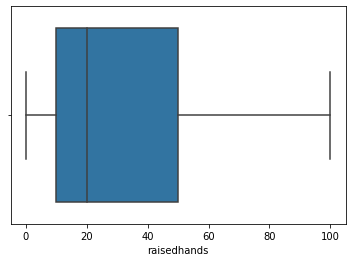

In [ ]:
sns.boxplot(data=data['raisedhands'],x=data['raisedhands']) 

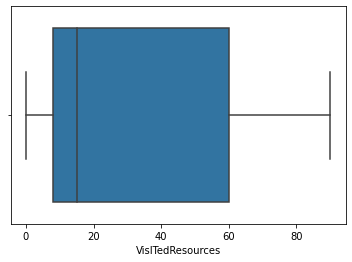

In [ ]:
sns.boxplot(data=data['VisITedResources'],x=data['VisITedResources'])

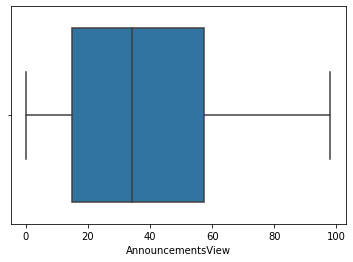

In [ ]:
sns.boxplot(data=data['AnnouncementsView'],x=data['AnnouncementsView'])

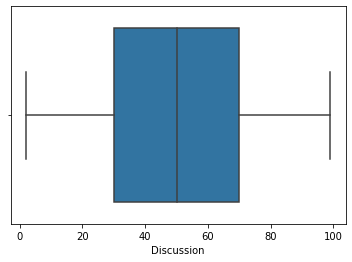

In [ ]:
sns.boxplot(data=data['Discussion'],x=data['Discussion'])

In [ ]:
numeric = list(data.select_dtypes(include=np.number).columns)
numeric

['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

Plotting HistoGram for continuous numerical values

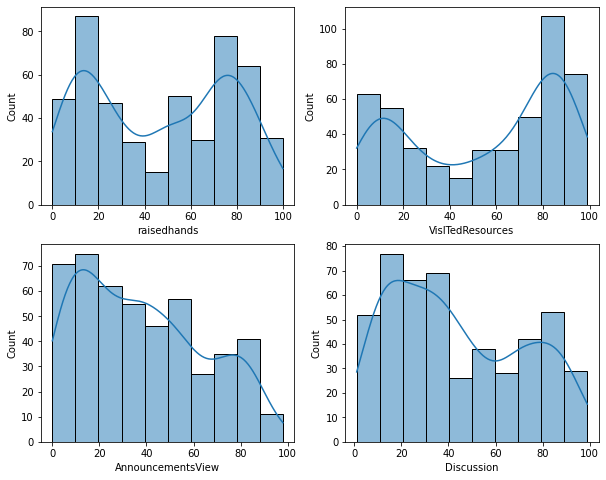

In [ ]:
figure = plt.figure(figsize=(10, 8))
for i in range(len(numeric)):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[numeric[i]], bins=10, kde=True)

Applying data transformation techniques 

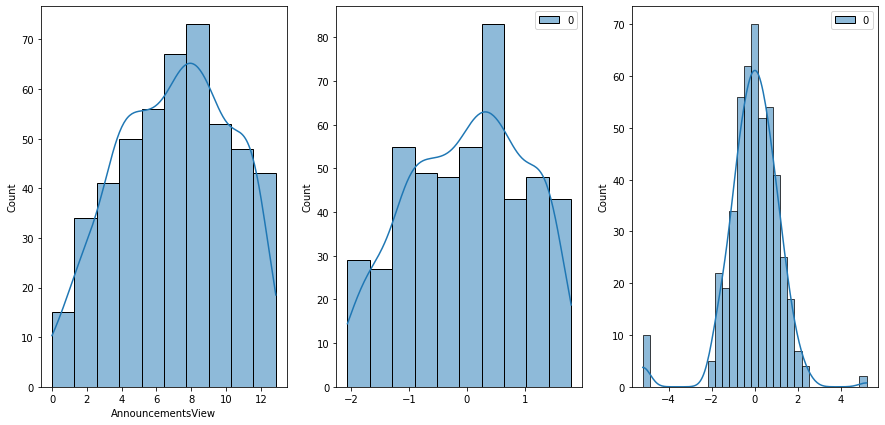

In [ ]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

# Manual Transform
figure = plt.figure(figsize=(15, 7))
transform_data = data["AnnouncementsView"]
data1 = transform_data**(0.557)
plt.subplot(1, 3, 1)
sns.histplot(data1, kde=True)

# using power-transformer
transformer = PowerTransformer()
data1 = transformer.fit_transform(np.array(transform_data).reshape(-1, 1))
plt.subplot(1, 3, 2)
sns.histplot(data1, kde=True)

# using quantile-transformer
transformer = QuantileTransformer(n_quantiles=50, output_distribution='normal')
data1 = transformer.fit_transform(np.array(transform_data).reshape(-1, 1))
plt.subplot(1, 3, 3)
sns.histplot(data1, kde=True)